    Predict next day Close price for Microsoft and Apple stock using a classical statistical method called ARIMA, Autoregressive Integrated Moving Average.
    ARIMA model has three hyperparameters: ARIMA(p,d,q). The goal of preliminary statistical analysis is to define those hyperparameters. 
    

In [21]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
msft_df = pd.read_csv(r'C:\Users\Luba Tovbin\Desktop\CMPE-256\Project\data\MSFT.csv')
aapl_df = pd.read_csv(r'C:\Users\Luba Tovbin\Desktop\CMPE-256\Project\data\AAPL.csv')

In [24]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8590 entries, 0 to 8589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8590 non-null   object 
 1   Open       8590 non-null   float64
 2   High       8590 non-null   float64
 3   Low        8590 non-null   float64
 4   Close      8590 non-null   float64
 5   Adj Close  8590 non-null   float64
 6   Volume     8590 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 469.9+ KB


In [25]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9916 entries, 0 to 9915
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9916 non-null   object 
 1   Open       9915 non-null   float64
 2   High       9915 non-null   float64
 3   Low        9915 non-null   float64
 4   Close      9915 non-null   float64
 5   Adj Close  9915 non-null   float64
 6   Volume     9915 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.4+ KB


In [26]:
# Apple dataset has one null record. Delete it.
aapl_df.dropna(inplace=True)

In [27]:
# Create univariant time series out of the'Close' price column.
ts_msft = msft_df['Close']
ts_aapl = aapl_df['Close']

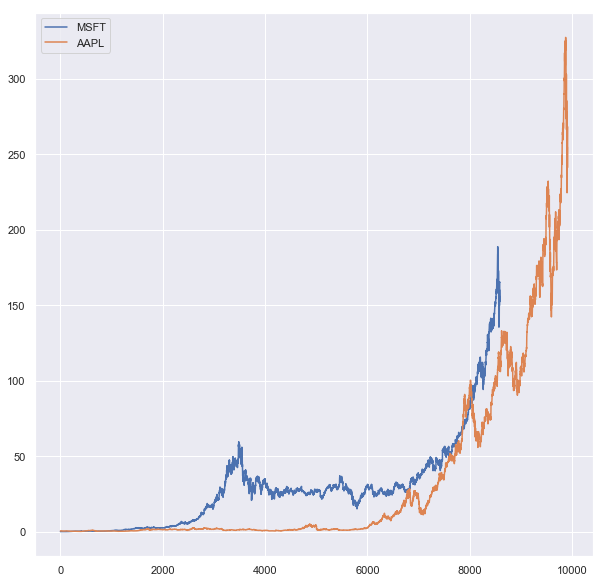

In [28]:
# visualize MSFT and AAPL closing stock prices over the years.
plt.figure(figsize = (10,10))
plt.plot(ts_msft, label='MSFT')
plt.plot(ts_aapl, label='AAPL')
plt.legend()
plt.show()

It is crear, that the given time series are not stationary, meaning the statistics change over time.
Augmented Dickey-Fuller (ADF) test is a type of statistical test that tells us how strongly a time series is deﬁned by a trend. 
H0: the data is non stationary
H1: the data is stationary
We interpret the result of the test based on the p-value:
    p-value > 0.05 means failure to reject null hypothesis, H0, and the data is non-stationary
    p-value =< 0.05 reject H0, meaning the data is stationary

In [43]:
# statsmodels library provids a build-in ADF test. Let's see what we get for MSFT and AAPL stock.

# MSFT:
msft_res = adfuller(ts_msft) 
print('Results for MSFT')
print('ADF Statistic: %f' % msft_res[0]) 
print('p-value: %f' % msft_res[1]) 
print('Critical Values:') 
for key, value in msft_res[4].items(): 
    print('\t%s: %.3f' % (key, value))

Results for MSFT
ADF Statistic: 5.105756
p-value: 1.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [44]:
# AAPL:
aapl_res = adfuller(ts_aapl) 
print('Results for AAPL')
print('ADF Statistic: %f' % aapl_res[0]) 
print('p-value: %f' % aapl_res[1]) 
print('Critical Values:') 
for key, value in aapl_res[4].items(): 
    print('\t%s: %.3f' % (key, value))

Results for AAPL
ADF Statistic: 3.453225
p-value: 1.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


    The more negative ADF statistics, the more likely we're to reject H0. Here, we have a positive value for ADF statistics in both cases.
    For both stocks we got p-value greater than 0.05, meaning the failure to reject the null hypothesis. That means the both time series have some time dependent structure and not stationary.
    However, to apply ARIMA model for prediction, we have to make the time series stationary. That can be acomplished by differencing. Differencing a time series of observations means subtracting each value from the next one. The differencing procedure can be applied several times if needed.
    The hyperparameter d in ARIMA(p,d,q) shows the order of differencing that needed to make time series stationary.
    An autocorrelation plot can help us to determine the differencing order for a given time series.

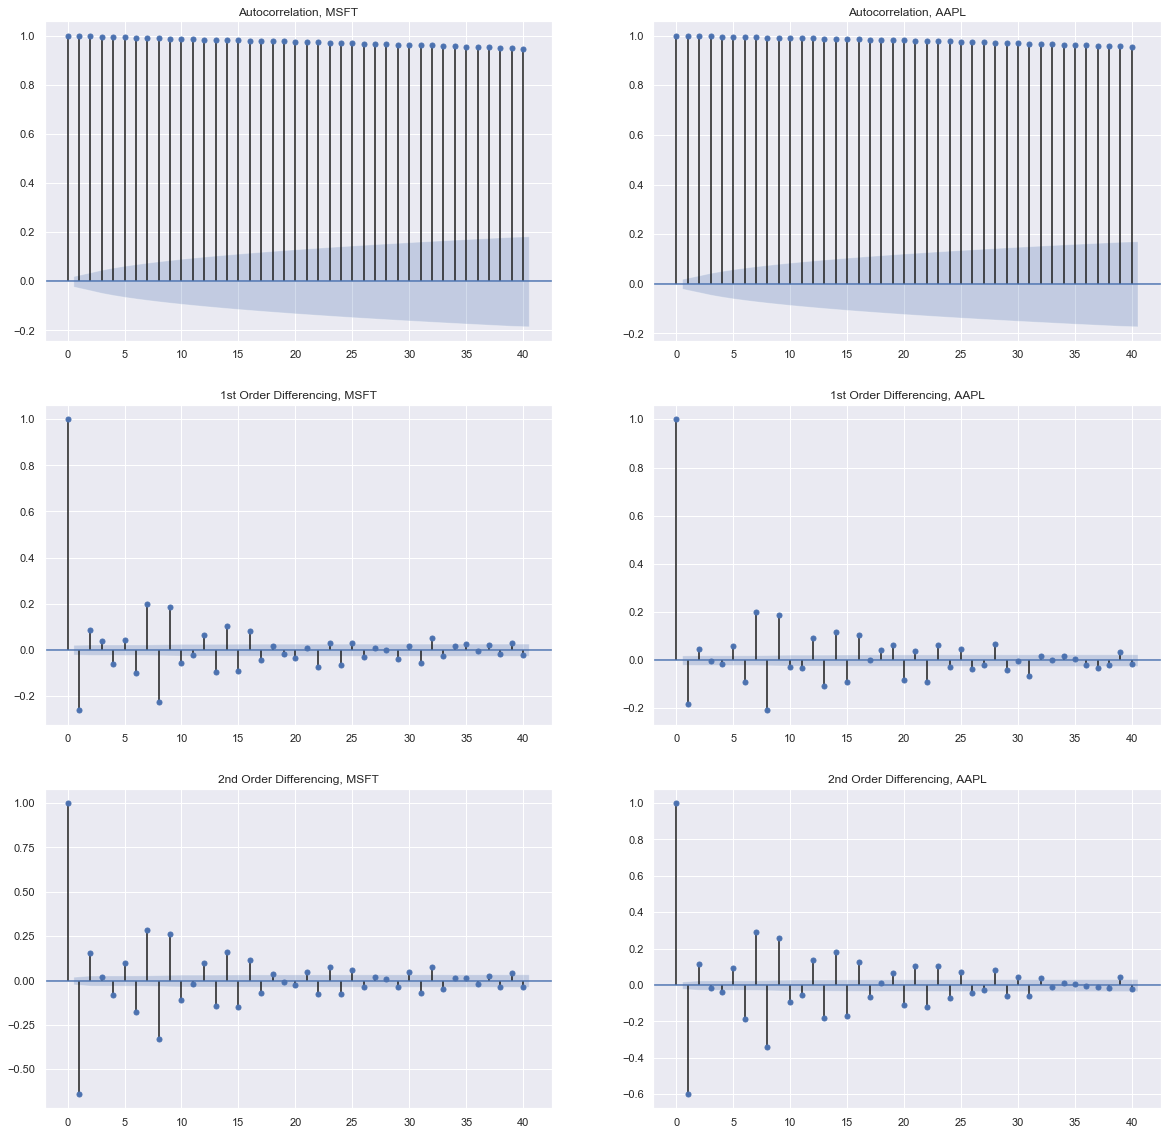

In [40]:
# Use autocorrelation to find out d, the order of differencing.
fig,ax = plt.subplots(3,2, figsize=(20, 20))

fig = plot_acf(ts_msft, ax=ax[0][0], title='Autocorrelation, MSFT') 
fig = plot_acf(ts_aapl, ax=ax[0][1], title='Autocorrelation, AAPL') 

fig = plot_acf(ts_msft.diff().dropna(), ax=ax[1][0], title='1st Order Differencing, MSFT')
fig = plot_acf(ts_aapl.diff().dropna(), ax=ax[1][1], title='1st Order Differencing, AAPL')

fig = plot_acf(ts_msft.diff().diff().dropna(), ax=ax[2][0], title="2nd Order Differencing, MSFT")
fig = plot_acf(ts_aapl.diff().diff().dropna(), ax=ax[2][1], title="2nd Order Differencing, AAPL")

From the above graphics, it look like the timeseries are stationary at the level of differencing d=1
Let's run ADF test again to see how 1st order differencing affects the sttaionarity of the series.

In [46]:
# MSFT:
msft_res = adfuller(ts_msft.diff().dropna()) 
print('Results for MSFT')
print('ADF Statistic: %f' % msft_res[0]) 
print('p-value: %f' % msft_res[1]) 
print('Critical Values:') 
for key, value in msft_res[4].items(): 
    print('\t%s: %.3f' % (key, value))

Results for MSFT
ADF Statistic: -18.061580
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [47]:
# AAPL:
aapl_res = adfuller(ts_aapl.diff().dropna()) 
print('Results for AAPL')
print('ADF Statistic: %f' % aapl_res[0]) 
print('p-value: %f' % aapl_res[1]) 
print('Critical Values:') 
for key, value in aapl_res[4].items(): 
    print('\t%s: %.3f' % (key, value))

Results for AAPL
ADF Statistic: -17.585387
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


    From the results above, we can see that ADF statistics in both, Microsoft and Apple, are now less than the critical value at 1%. That means that we can reject the null hypothesis with 99% level of confidence. The both time series are staionary after differencing.
    Now, we use partial autocorrelation plot to determine p, the first hyperparameter in the ARIMA(p,d,q) model.

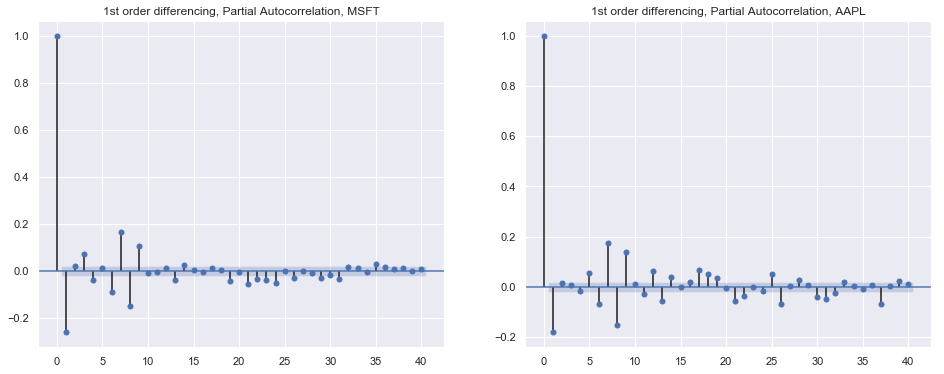

In [48]:
# Use partial autocorrelation graph on differenced series to determine the number of autoregressive terms, p.
# Knowing that d=1, we apply diff() once
# p = number of lags above the level of significance.

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig = plot_pacf(ts_msft.diff().dropna(), ax=ax[0], lags=40,
                title='1st order differencing, Partial Autocorrelation, MSFT') 
fig = plot_pacf(ts_aapl.diff().dropna(), ax=ax[1], lags=40,
                title='1st order differencing, Partial Autocorrelation, AAPL') 

Choose p=1.
Now, it is time to determine q, the last hyperparameter of an ARIMA(p,d,q) model. To do that, we plot an auocorrelation graph on the differenced time series with the predetermind order of differencing d=1.

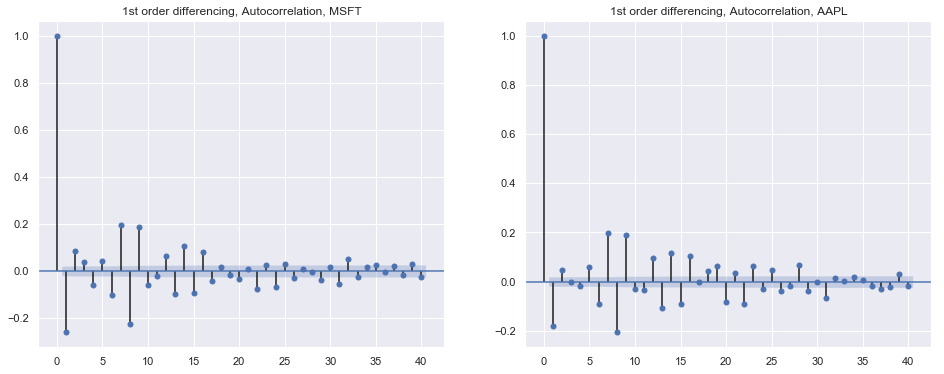

In [49]:
# Use autocorrelation graph on differenced series to determine the number of moving average terms, q.

fig, ax = plt.subplots(1,2, figsize=(16,6))
fig = plot_acf(ts_msft.diff().dropna(), ax=ax[0], title='1st order differencing, Autocorrelation, MSFT')
fig = plot_acf(ts_aapl.diff().dropna(), ax=ax[1], title='1st order differencing, Autocorrelation, AAPL')

Choose q=7

In [51]:
# Build the model for Microsoft timeseries, ARIMA(p,d,q)
# p=1, number of autoregressive terms
# d=1, order of diffencing
# q=7, number of moving average terms

model_msft = ARIMA(ts_msft, order=(1, 1, 7))
# Fits ARIMA(p,d,q) model by exact maximum likelihood via Kalman filter
res_msft = model_msft.fit()
res_msft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 8589
Model:                 ARIMA(1, 1, 7)   Log Likelihood              -10562.887
Method:                       css-mle   S.D. of innovations              0.828
Date:                Thu, 30 Apr 2020   AIC                          21145.775
Time:                        09:47:49   BIC                          21216.357
Sample:                             1   HQIC                         21169.848
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0192      0.008      2.377      0.017       0.003       0.035
ar.L1.D.Close    -0.6355      0.023    -27.555      0.000      -0.681      -0.590
ma.L1.D.Close     0.4291      0.024     17.830      0.000       0.382       0.476
ma.L2.D.Close    -0.0753      0.012     -6.233      0.000      -0.099      -0.052
ma.L3.D.Close     0.0760      0.012      6.304      0.000       0.052       0.100
ma.L4.D.Close    -0.0244      0.014     -1.800      0.072      -0.051       0.002
ma.L5.D.Close    -0.0247      0.012     -2.142      0.032      -0.047      -0.002
ma.L6.D.Close    -0.0345      0.012     -2.872      0.004      -0.058      -0.011
ma.L7.D.Close     0.1337      0.012     11.194      0.000       0.110       0.157
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5736           +0.0000j            1.5736            0.5000
MA.1           -1.1064           -0.0000j            1.1064           -0.5000
MA.2           -0.9107           -0.9497j            1.3158           -0.3717
MA.3           -0.9107           +0.9497j            1.3158            0.3717
MA.4            0.2702           -1.3191j            1.3465           -0.2178
MA.5            0.2702           +1.3191j            1.3465            0.2178
MA.6            1.3226           -0.6353j            1.4673           -0.0713
MA.7            1.3226           +0.6353j            1.4673            0.0713
-----------------------------------------------------------------------------
"""

In [52]:
# Build the model for Microsoft timeseries, ARIMA(p,d,q)
model_aapl = ARIMA(ts_aapl, order=(1, 1, 7))

# Fits ARIMA(p,d,q) model by exact maximum likelihood via Kalman filter
res_aapl = model_aapl.fit()
res_aapl.summary()

C:\Users\Luba Tovbin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Luba Tovbin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 9914
Model:                 ARIMA(1, 1, 7)   Log Likelihood              -16660.183
Method:                       css-mle   S.D. of innovations              1.299
Date:                Thu, 30 Apr 2020   AIC                          33340.365
Time:                        09:47:57   BIC                          33412.382
Sample:                             1   HQIC                         33364.753
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0271      0.013      2.100      0.036       0.002       0.052
ar.L1.D.Close    -0.6358      0.019    -33.565      0.000      -0.673      -0.599
ma.L1.D.Close     0.5177      0.020     25.902      0.000       0.478       0.557
ma.L2.D.Close    -0.0805      0.011     -7.101      0.000      -0.103      -0.058
ma.L3.D.Close    -0.0151      0.012     -1.308      0.191      -0.038       0.008
ma.L4.D.Close     0.0270      0.013      2.114      0.035       0.002       0.052
ma.L5.D.Close     0.0126      0.011      1.159      0.247      -0.009       0.034
ma.L6.D.Close    -0.0209      0.012     -1.771      0.077      -0.044       0.002
ma.L7.D.Close     0.1792      0.011     16.399      0.000       0.158       0.201
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5728           +0.0000j            1.5728            0.5000
MA.1           -1.0954           -0.0000j            1.0954           -0.5000
MA.2           -0.8497           -0.8615j            1.2101           -0.3739
MA.3           -0.8497           +0.8615j            1.2101            0.3739
MA.4            1.2198           -0.6215j            1.3690           -0.0750
MA.5            1.2198           +0.6215j            1.3690            0.0750
MA.6            0.2359           -1.3419j            1.3625           -0.2223
MA.7            0.2359           +1.3419j            1.3625            0.2223
-----------------------------------------------------------------------------
"""

C:\Users\Luba Tovbin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Luba Tovbin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Luba Tovbin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


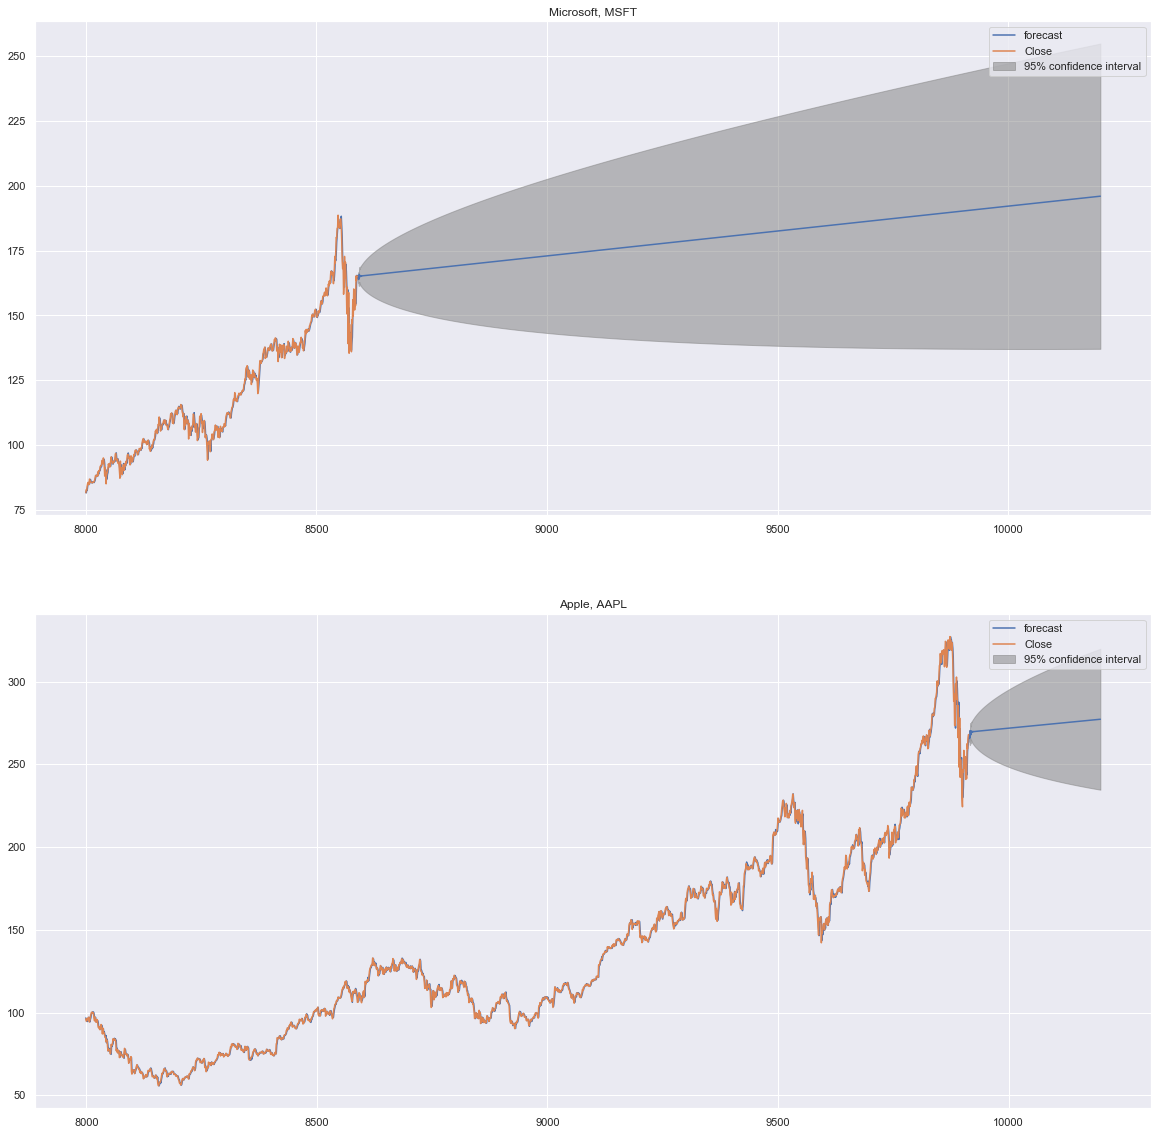

In [69]:
fig,ax = plt.subplots(2,1,figsize=(20, 20))

ax[0].set_title('Microsoft, MSFT')
fig = res_msft.plot_predict(start=8000, end=10200, ax=ax[0], alpha=0.05)

ax[1].set_title('Apple, AAPL')
fig = res_aapl.plot_predict(start=8000, end=10200, ax=ax[1], alpha=0.05)

plt.legend()
plt.show()